## Time Series

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
df=pd.read_csv('/content/infy_stock.csv')

In [3]:
df.head()

,Date,VWAP
0,01/01/2015,1971.34
1,02/01/2015,2003.25
2,05/01/2015,2004.59
3,06/01/2015,1954.82
4,07/01/2015,1962.59


In [4]:
df.tail()

,Date,VWAP
243,24/12/2015,1095.84
244,28/12/2015,1105.51
245,29/12/2015,1104.14
246,30/12/2015,1094.45
247,31/12/2015,1102.09


In [5]:
df.shape

(248, 2)

In [6]:
## Cleaning up the data
df.columns=["Date","Stock Price"]
df.head()

,Date,Stock Price
0,01/01/2015,1971.34
1,02/01/2015,2003.25
2,05/01/2015,2004.59
3,06/01/2015,1954.82
4,07/01/2015,1962.59


In [7]:
df.tail()

,Date,Stock Price
243,24/12/2015,1095.84
244,28/12/2015,1105.51
245,29/12/2015,1104.14
246,30/12/2015,1094.45
247,31/12/2015,1102.09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         248 non-null    object 
 1   Stock Price  248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [9]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-9-02a7971ad980>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [10]:
df.head()

,Date,Stock Price
0,2015-01-01,1971.34
1,2015-02-01,2003.25
2,2015-05-01,2004.59
3,2015-06-01,1954.82
4,2015-07-01,1962.59


In [11]:
df.set_index('Date',inplace=True)

In [12]:
df.head()

,Stock Price
Date,
2015-01-01,1971.34
2015-02-01,2003.25
2015-05-01,2004.59
2015-06-01,1954.82
2015-07-01,1962.59


In [13]:
df.describe()

,Stock Price
count,248.000000
mean,1548.133589
std,528.861589
min,941.180000
25%,1085.907500
50%,1146.245000
75%,2125.082500
max,2322.170000


## Visualize the Data

<Axes: xlabel='Date'>

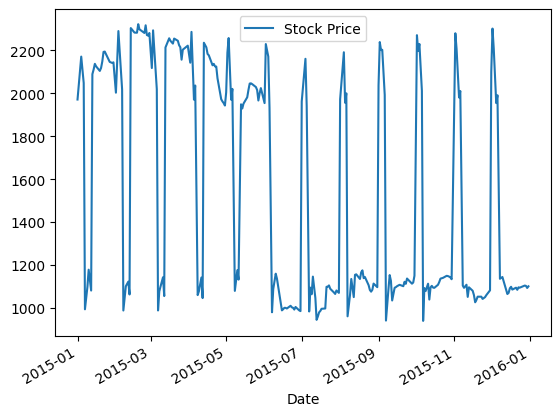

In [14]:
df.plot()

In [15]:
#looking this graph,we can say this data is seasonal
#(seasonal is all about suppose in each month stock price goes up) and then down

In [16]:
# we plot,whether test is stationary or not
#if not stationery then how to make it stationery

In [17]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['Stock Price'])

In [19]:
#adfuller gives 5 values ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
#most imp is p-value
#this is almost similar to Hypothesis testing,whereas Null hypo which says Data is not Stationery
#whereas Alternate hypo says data is stationery



In [20]:
###if Pvalue<0.05 ,we reject Null hypo ie alternate hypo is true,ie data is stationery

In [21]:

#zip basically combines result,labels

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [22]:
adfuller_test(df['Stock Price'])

ADF Test Statistic : -0.9815304352676791
p-value : 0.7599409065801572
#Lags Used : 0
Number of Observations Used : 247
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
#if our data is non-stationery,we have to make it stationery using various techniques such as Differencing & many more

## Differencing

In [24]:
df

,Stock Price
Date,
2015-01-01,1971.34
2015-02-01,2003.25
2015-05-01,2004.59
2015-06-01,1954.82
2015-07-01,1962.59
...,...
2015-12-24,1095.84
2015-12-28,1105.51
2015-12-29,1104.14


In [25]:
df['Stock Price'].shift(1)

Date
2015-01-01        NaN
2015-02-01    1971.34
2015-05-01    2003.25
2015-06-01    2004.59
2015-07-01    1954.82
               ...   
2015-12-24    1097.35
2015-12-28    1095.84
2015-12-29    1105.51
2015-12-30    1104.14
2015-12-31    1094.45
Name: Stock Price, Length: 248, dtype: float64

In [26]:
df['Stock Price First Difference'] = df['Stock Price'] - df['Stock Price'].shift(1)

In [27]:
#why taken shift(247),bcz basically year has 247 day cycle in stocks
df['Seasonal First Difference']=df['Stock Price']-df['Stock Price'].shift(20)

In [28]:
df.head(14)

,Stock Price,Stock Price First Difference,Seasonal First Difference
Date,,,
2015-01-01,1971.34,NaN,NaN
2015-02-01,2003.25,31.91,NaN
2015-05-01,2004.59,1.34,NaN
2015-06-01,1954.82,-49.77,NaN
2015-07-01,1962.59,7.77,NaN
2015-08-01,1972.78,10.19,NaN
2015-09-01,2037.69,64.91,NaN
2015-12-01,2099.40,61.71,NaN
2015-01-13,2089.42,-9.98,NaN


In [29]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Stock Price'].shift(24)

In [30]:
## Again test dickey fuller test on df['Stock Price First Difference']
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.5275287910619615
p-value : 0.10891912753005634
#Lags Used : 0
Number of Observations Used : 227
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
#now our p-value is less than 0.05 which basically says we are rejecting null hypo and accepting alternate hypo
#ie data is stationery
#if p-value is almost 0,then we have a wonderful stationery graph

<Axes: xlabel='Date'>

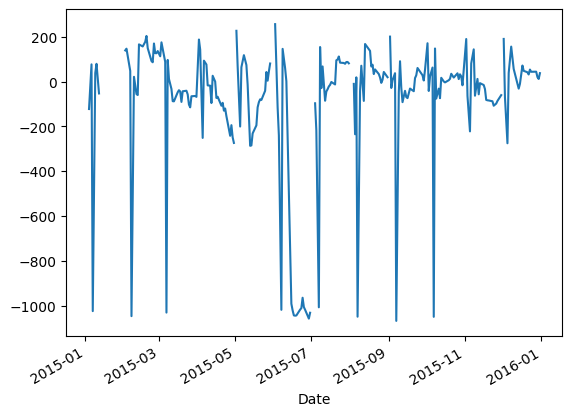

In [32]:
df['Seasonal First Difference'].plot()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Autocorrelation(plot_acf),Partial Autocorrelation(plot_pacf)

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


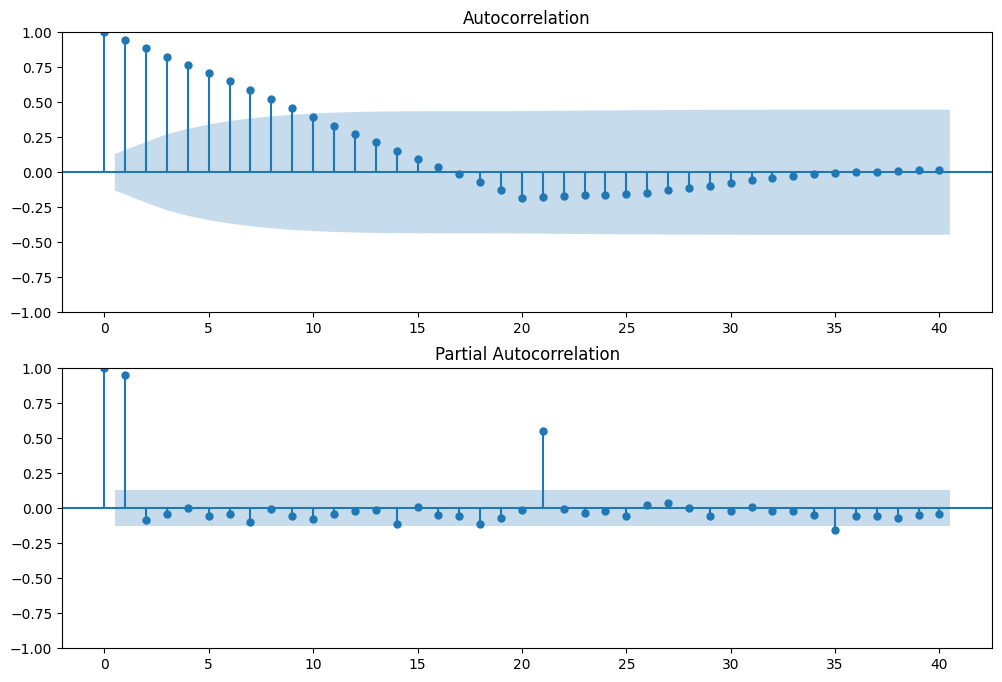

In [35]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[21:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[21:],lags=40,ax=ax2)

In [36]:
# For non-seasonal data
#p=1, d=1, q=0 or 1


## ARIMA Model

In [37]:
model=ARIMA(df['Stock Price'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Stock Price   No. Observations:                  248
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1390.367
Date:                Tue, 02 May 2023   AIC                           2786.734
Time:                        07:48:57   BIC                           2797.262
Sample:                             0   HQIC                          2790.972
                                - 248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1063     21.971     -0.005      0.996     -43.168      42.955
ma.L1          0.1365     21.982      0.006      0.995     -42.948      43.221
sigma2      4566.9149     60.856     75.045      0.000    4447.639    4686.191
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            388451.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                           -13.17
Prob(H) (two-sided):                  0.00   Kurtosis:                       195.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
## note: when u have seasonal data, use SARIMAX over there..

In [40]:
import statsmodels as sm

In [41]:
#seasonal_order=(1,1,1,20)
#(p,d,q,shift_value)

In [42]:
df['forecast']=model_fit.predict(start=224,end=245,dynamic=True)

<Axes: xlabel='Date'>

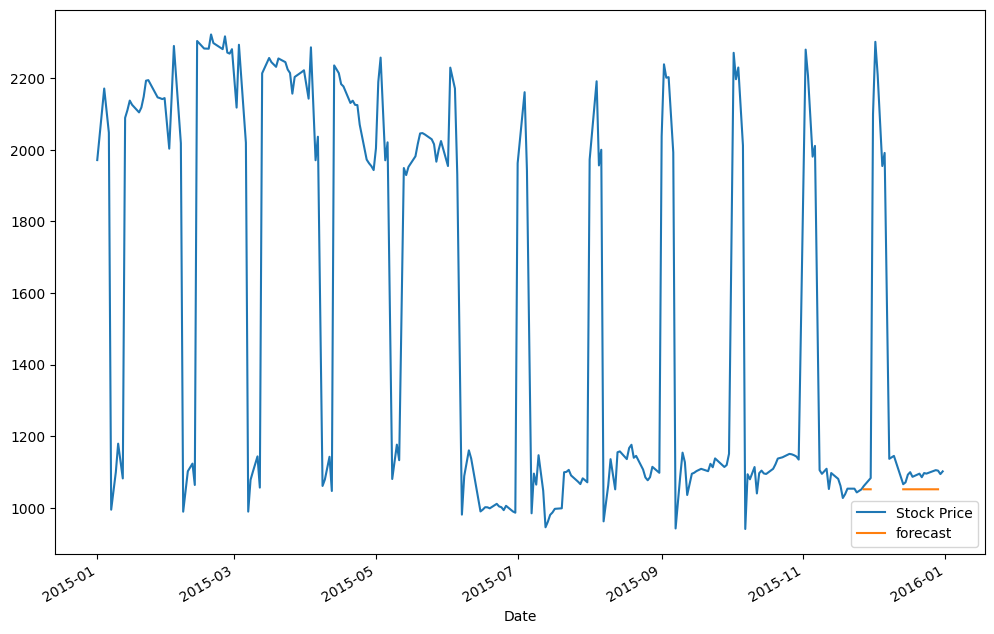

In [43]:
#blue line is original data anf orange is a forecasted data
df[['Stock Price','forecast']].plot(figsize=(12,8))

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
model=SARIMAX(df['Stock Price'],order=(1, 1, 1),seasonal_order=(1,1,1,20))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
#predicting from index 224 to 245
df['forecast']=results.predict(start=224,end=245,dynamic=True)


<Axes: xlabel='Date'>

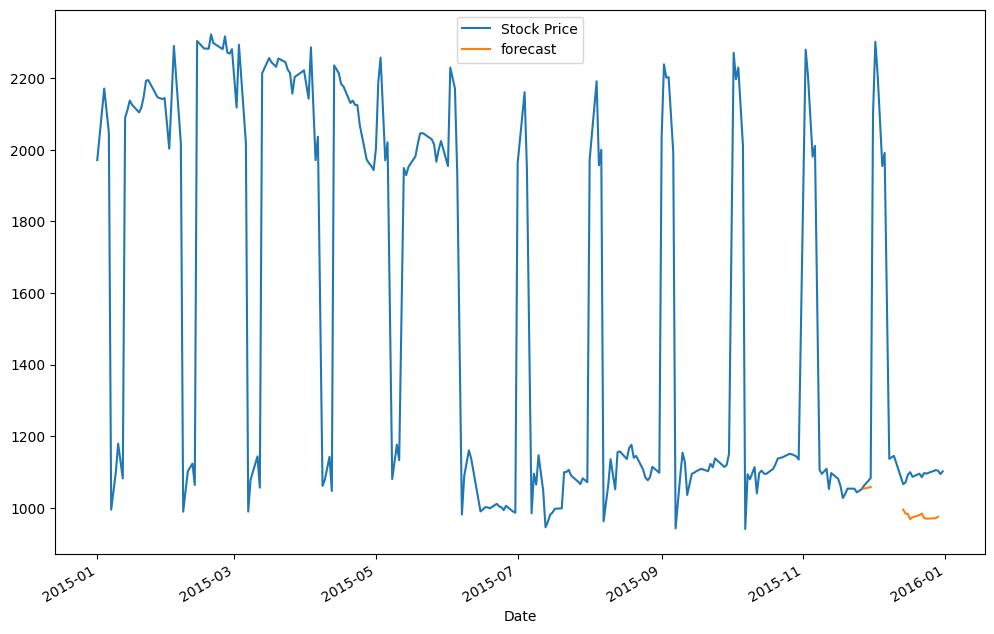

In [47]:
#blue line is original data anf orange is a forecasted data
df[['Stock Price','forecast']].plot(figsize=(12,8))

In [48]:
### to see how future predictions/projections looks like

In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
df.index[-1]

Timestamp('2015-12-31 00:00:00')

In [51]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,40)]

In [52]:
future_dates

[Timestamp('2015-12-31 00:00:00'),
 Timestamp('2016-01-31 00:00:00'),
 Timestamp('2016-02-29 00:00:00'),
 Timestamp('2016-03-31 00:00:00'),
 Timestamp('2016-04-30 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 Timestamp('2016-06-30 00:00:00'),
 Timestamp('2016-07-31 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-30 00:00:00'),
 Timestamp('2016-10-31 00:00:00'),
 Timestamp('2016-11-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-31 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-31 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-31 00:00:00'),
 Timestamp('2018-01-31 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-

In [83]:
from pandas.tseries.offsets import DateOffset

#creating additional dataset for 40 days,
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,40)]

In [54]:
future_datset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [55]:
future_datset_df.tail()

,Stock Price,Stock Price First Difference,Seasonal First Difference,Seasonal Second Difference,forecast
2018-11-30,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN
2019-01-31,NaN,NaN,NaN,NaN,NaN
2019-02-28,NaN,NaN,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN,NaN,NaN


In [56]:
future_df=pd.concat([df,future_datset_df])

In [57]:
#then we can see future predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

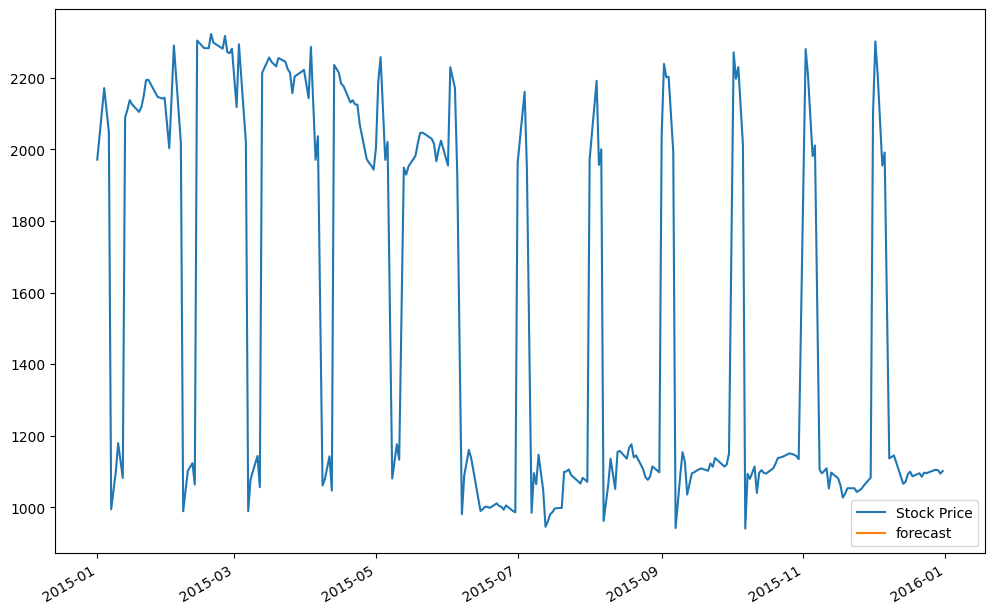

In [58]:
future_df['forecast'] = results.predict(start = 247, end = 270, dynamic= True)  
future_df[['Stock Price', 'forecast']].plot(figsize=(12, 8)) 

In [59]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00


In [60]:
from pmdarima import auto_arima 
import warnings
warnings.filterwarnings('ignore')

In [61]:
stepwise_fit = auto_arima(df['Stock Price'], start_p=0, start_q=0, max_p=10, max_q=10, seasonal=True, m=20, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[20] intercept   : AIC=2788.006, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[20] intercept   : AIC=2784.285, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[20] intercept   : AIC=2787.841, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[20] intercept   : AIC=2787.840, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[20]             : AIC=2782.960, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[20] intercept   : AIC=2786.005, Time=0.59 sec
 ARIMA(0,1,0)(0,0,1)[20] intercept   : AIC=2786.007, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[20] intercept   : AIC=2786.099, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[20] intercept   : AIC=2786.094, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[20] intercept   : AIC=2788.092, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[20]          
Total fit time: 4.749 seconds


In [62]:
model=SARIMAX(df['Stock Price'],order=(0,0, 1),seasonal_order=(1,1,0,20))
results=model.fit()

In [84]:
#predicting from index 225 to 246
df['forecast']=results.predict(start=225,end=246,dynamic=True)


<Axes: xlabel='Date'>

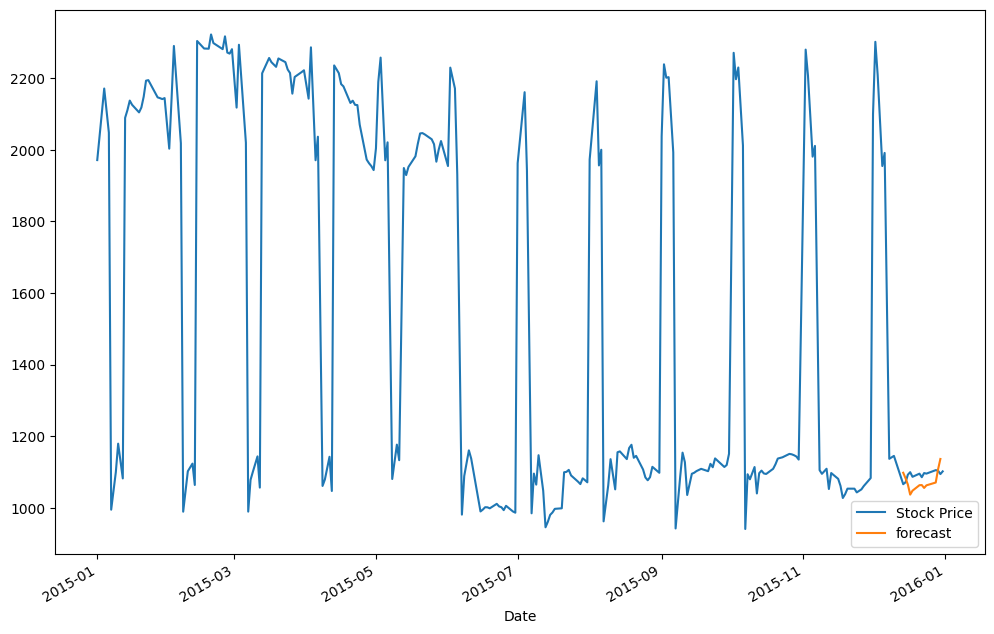

In [64]:
#blue line is original data anf orange is a forecasted data
df[['Stock Price','forecast']].plot(figsize=(12,8))

In [65]:
df.tail(13).head(12)

,Stock Price,Stock Price First Difference,Seasonal First Difference,Seasonal Second Difference,forecast
Date,,,,,
2015-12-14,1066.30,13.42,-31.15,-1169.00,1098.228914
2015-12-15,1071.44,5.14,-9.79,-1137.47,1082.964381
2015-12-16,1092.86,21.42,31.33,-1082.89,1065.374948
2015-12-17,1099.83,6.97,72.07,-1037.35,1037.160045
2015-12-18,1086.91,-12.92,48.35,-1049.10,1048.172371
2015-12-21,1095.68,8.77,41.85,-1039.38,1063.526609
2015-12-22,1085.81,-9.87,32.05,-1029.48,1063.867414
2015-12-23,1097.35,11.54,53.95,-973.81,1055.802613
2015-12-24,1095.84,-1.51,44.05,-994.51,1063.092902


In [66]:
df.tail(13).head(12)['forecast'] = df.tail(13).head(12)['forecast'].fillna(df.tail(13).head(12)['forecast'].mean())

In [67]:
mean_absolute_error(df.tail(13).head(12)['Stock Price'], df.tail(13).head(12)['forecast'])

31.760930338803387

In [68]:
mean_absolute_percentage_error(df.tail(13).head(12)['Stock Price'], df.tail(13).head(12)['forecast'])

0.02907346450755161

In [69]:
mean_squared_error(df.tail(13).head(12)['Stock Price'], df.tail(13).head(12)['forecast'])**0.5

34.929942107965765

## Prophet Model

In [70]:
from prophet import Prophet

In [71]:
data = df.reset_index().rename(columns={'Date':'ds',
                                 'Stock Price':'y'})[['ds','y']]

In [72]:
m = Prophet()
m.fit(data[:-20])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10wfuwip/b457q0pg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp10wfuwip/afvlu6d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34693', 'data', 'file=/tmp/tmp10wfuwip/b457q0pg.json', 'init=/tmp/tmp10wfuwip/afvlu6d3.json', 'output', 'file=/tmp/tmp10wfuwip/prophet_modelbde9kelk/prophet_model-20230502074934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
data[:-20]

,ds,y
0,2015-01-01,1971.34
1,2015-02-01,2003.25
2,2015-05-01,2004.59
3,2015-06-01,1954.82
4,2015-07-01,1962.59
...,...,...
223,2015-11-26,1051.79
224,2015-11-27,1060.99
225,2015-11-30,1083.44
226,2015-01-12,1082.42


In [74]:
future = m.make_future_dataframe(periods=20, freq='M')
future.tail()

,ds
243,2017-03-31
244,2017-04-30
245,2017-05-31
246,2017-06-30
247,2017-07-31


In [75]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
243,2017-03-31,29.506634,-571.657814,647.643674
244,2017-04-30,-11.360679,-600.978948,526.972813
245,2017-05-31,-196.802912,-761.592803,443.752102
246,2017-06-30,-192.894267,-764.975681,410.495720
247,2017-07-31,-395.704570,-1008.354618,192.348646


In [76]:
data[-20:]

,ds,y
228,2015-03-12,1056.77
229,2015-04-12,1047.32
230,2015-07-12,1048.08
231,2015-08-12,1051.88
232,2015-09-12,1036.19
233,2015-10-12,1040.47
234,2015-11-12,1052.88
235,2015-12-14,1066.30
236,2015-12-15,1071.44
237,2015-12-16,1092.86


In [77]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [78]:
plot_components_plotly(m, forecast)

In [79]:
forecast[-20:]['yhat']

228    1138.061232
229    1100.643828
230     870.269791
231     915.660330
232     847.469663
233     825.499931
234     693.259429
235     655.842025
236     470.399791
237     474.308437
238     271.498134
239     247.998890
240     248.698005
241     226.728273
242     158.297227
243      29.506634
244     -11.360679
245    -196.802912
246    -192.894267
247    -395.704570
Name: yhat, dtype: float64

In [80]:
mean_absolute_error(data[-20:]['y'], forecast[-20:]['yhat'])

671.1825463472501

In [81]:
mean_absolute_percentage_error(data[-20:]['y'], forecast[-20:]['yhat'])

0.6155502383143662

In [82]:
mean_squared_error(data[-20:]['y'], forecast[-20:]['yhat'])**0.5

802.7390094074282